In [75]:
import pandas as pd 
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
bitcoin = pd.read_csv("BTC-USD.csv");

In [3]:
Etherium = pd.read_csv("ETH-USD.csv")

In [4]:
bt= bitcoin.copy()

In [5]:
et = Etherium.copy()

In [6]:
bt.shape

(2520, 7)

In [7]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2520 non-null   object 
 1   Open       2516 non-null   float64
 2   High       2516 non-null   float64
 3   Low        2516 non-null   float64
 4   Close      2516 non-null   float64
 5   Adj Close  2516 non-null   float64
 6   Volume     2516 non-null   float64
dtypes: float64(6), object(1)
memory usage: 137.9+ KB


In [8]:
bt.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,8367.993124,8609.046940,8104.681274,8384.849217,8384.849217,1.314307e+10
std,12379.802902,12769.294273,11929.803665,12399.075891,12399.075891,1.979067e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,569.089508,575.391754,561.964737,569.758758,569.758758,7.095970e+07
50%,4947.056884,5115.198242,4829.396973,4971.905029,4971.905029,4.249775e+09
75%,9386.981445,9557.482911,9238.094238,9393.408692,9393.408692,2.026569e+10
max,63523.753910,64863.097660,62208.964840,63503.457030,63503.457030,3.509680e+11


In [9]:
bt.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
print(bt.duplicated().sum())  
bt = bt.drop_duplicates() # Values have been removed

0


In [11]:
bt.isnull().values.any()

True

In [12]:
pip install klib

Note: you may need to restart the kernel to use updated packages.


In [13]:
import klib

GridSpec(6, 6)

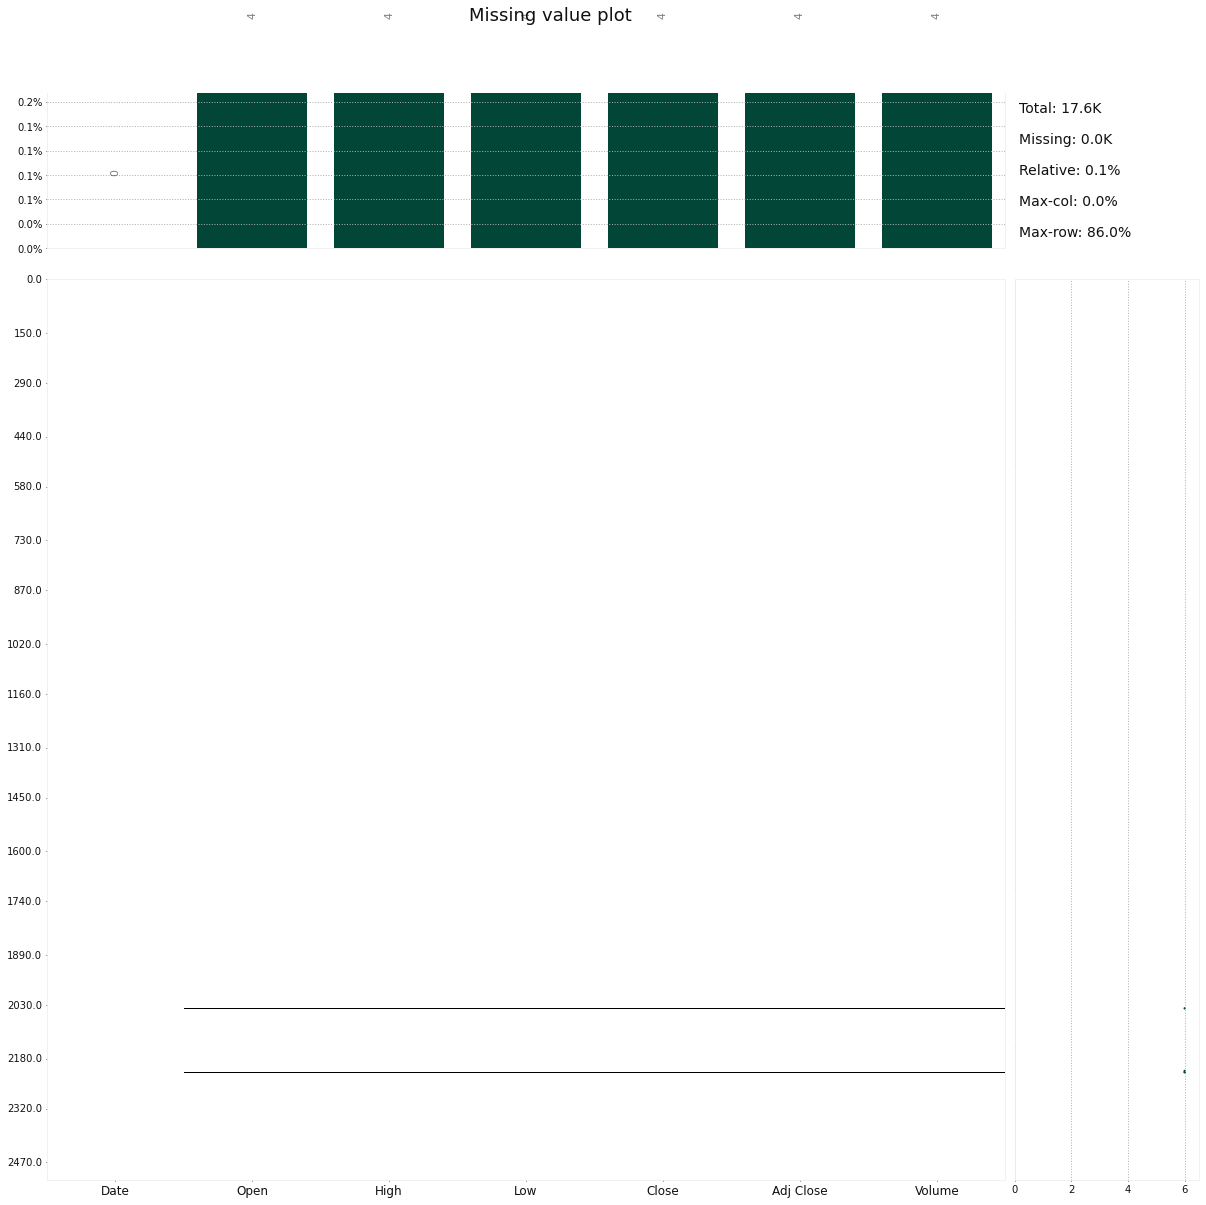

In [14]:
klib.missingval_plot(bt) # default representation of missing values in a DataFrame, plenty of settings are available

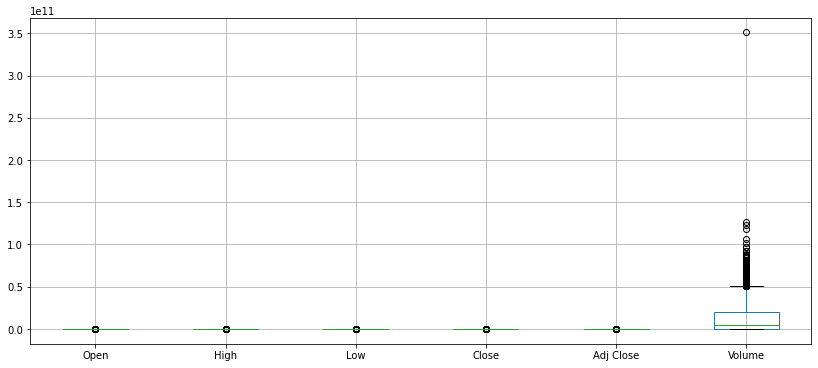

In [15]:
plt.figure(figsize=(14,6))
bt.boxplot()
print()

In [16]:
klib.corr_mat(bt) # returns a color-encoded correlation matrix


,Open,High,Low,Close,Adj Close,Volume
Open,1.00,1.00,1.00,1.00,1.00,0.79
High,1.00,1.00,1.00,1.00,1.00,0.79
Low,1.00,1.00,1.00,1.00,1.00,0.79
Close,1.00,1.00,1.00,1.00,1.00,0.79
Adj Close,1.00,1.00,1.00,1.00,1.00,0.79
Volume,0.79,0.79,0.79,0.79,0.79,1.00


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

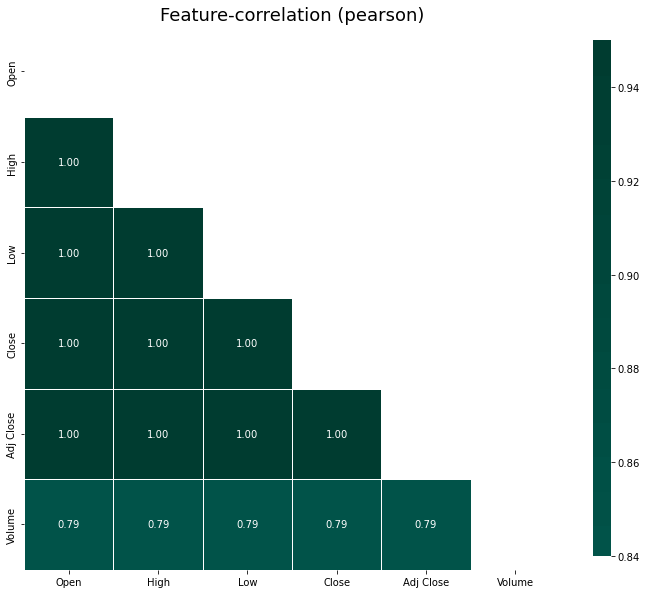

In [17]:
klib.corr_plot(bt) # returns a color-encoded heatmap, ideal for correlations


<AxesSubplot:xlabel='Volume', ylabel='Density'>

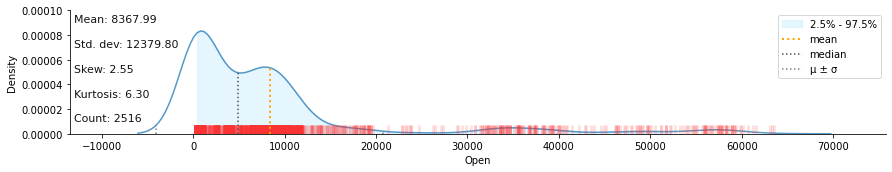

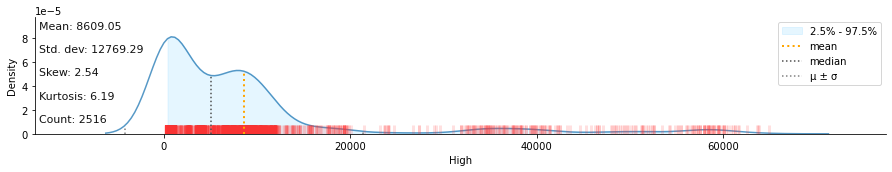

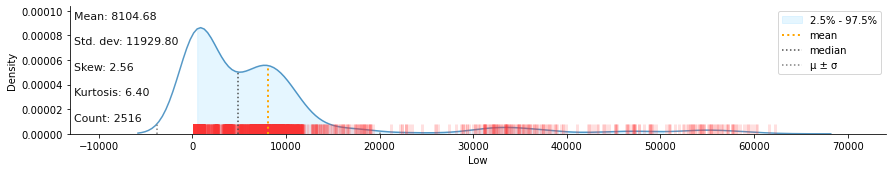

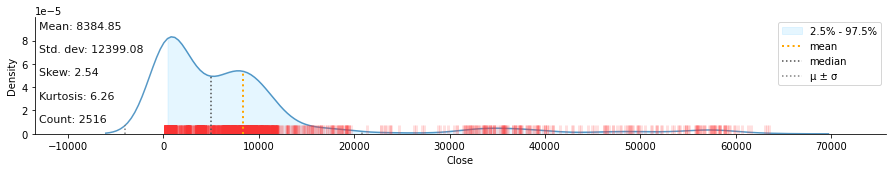

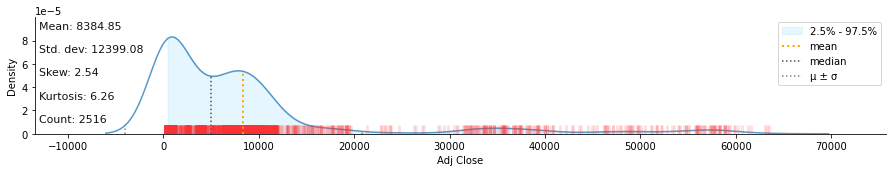

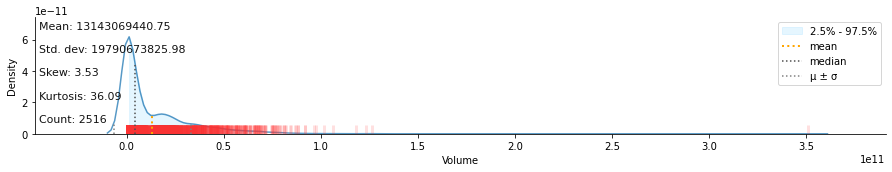

In [18]:
klib.dist_plot(bt) # returns a distribution plot for every numeric feature


Null Values and Outliers 

In [19]:
bt

,Date,Open,High,Low,Close,Adj Close,Volume
0,17/09/2014,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,18/09/2014,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,19/09/2014,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,20/09/2014,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,21/09/2014,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2515,06/08/2021,40865.867190,43271.660160,39932.179690,42816.500000,42816.500000,3.822648e+10
2516,07/08/2021,42832.796880,44689.859380,42618.566410,44555.800780,44555.800780,4.003086e+10
2517,08/08/2021,44574.437500,45282.351560,43331.910160,43798.117190,43798.117190,3.630266e+10
2518,09/08/2021,43791.925780,46456.832030,42848.687500,46365.402340,46365.402340,3.873408e+10


In [20]:
Q1 = bt['Volume'].quantile(.25)
Q3 = bt['Volume'].quantile(.75)

Q1,Q3

(70959700.0, 20265687079.25)

In [21]:
IQR = Q3 - Q1
IQR

20194727379.25

In [22]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower,upper

(-30221131368.875, 50557778148.125)

In [23]:
bt = bt[bt['Volume'] >= lower] 

In [24]:
bt = bt[bt['Volume'] <= upper]

In [25]:
bt.shape

(2370, 7)

In [26]:
bt.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2.370000e+03
mean,6244.305797,6399.871566,6079.016369,6257.894266,6257.894266,9.737006e+09
std,8429.196925,8641.260416,8185.441651,8447.195434,8447.195434,1.301917e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,453.417496,457.191994,446.933754,453.268509,453.268509,6.616648e+07
50%,4032.121949,4108.080567,3956.348755,4033.901856,4033.901856,3.666145e+09
75%,8834.371582,9011.227295,8664.930664,8837.544433,8837.544433,1.709102e+10
max,61221.132810,61597.917970,59302.316410,60204.964840,60204.964840,5.042005e+10


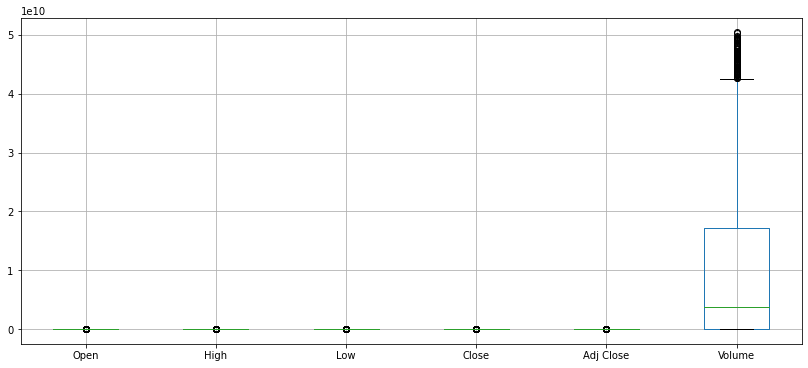

In [27]:
plt.figure(figsize=(14,6))
bt.boxplot()
print()

Fill Missing Values

In [28]:
#df.fillna(df.mean())
bt.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [29]:
#bt.fillna(bt.mean())

In [30]:
#bt.isnull().any()

In [31]:
bt['Date'] = pd.to_datetime(bt.Date , format = '%d/%m/%Y')
data = bt.drop(['Date'], axis=1)
data.index = bt['Date']

In [32]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...
2021-08-06,40865.867190,43271.660160,39932.179690,42816.500000,42816.500000,3.822648e+10
2021-08-07,42832.796880,44689.859380,42618.566410,44555.800780,44555.800780,4.003086e+10
2021-08-08,44574.437500,45282.351560,43331.910160,43798.117190,43798.117190,3.630266e+10


In [33]:
#bt.columns = bt.columns.str.replace(' ','_')

In [34]:
#bt.drop(columns=['B', 'C'])
from sklearn.model_selection import train_test_split

In [35]:
#btf = data['Open']

In [36]:
#btf

In [37]:
data['Price_After_Month']=data['Open'].shift(-30)

In [38]:
data['Price_After_Month']

Date
2014-09-17    382.756012
2014-09-18    383.976013
2014-09-19    391.253998
2014-09-20    389.230988
2014-09-21    382.420990
                 ...    
2021-08-06           NaN
2021-08-07           NaN
2021-08-08           NaN
2021-08-09           NaN
2021-08-10           NaN
Name: Price_After_Month, Length: 2370, dtype: float64

In [39]:
#Preprocessing
from sklearn import preprocessing
data.dropna(inplace=True)
X=data.drop('Price_After_Month', axis=1)
#X=preprocessing.scale(X)#We need to scale our values to input them in our model
y=data['Price_After_Month']

Train Test Split 

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [41]:
#X_train = data[:int(0.8*(len(data)))]
#X_test = data[int(0.8*(len(data))):]

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [43]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#X_train.reshape(-1,1)
#y_train.reshape(-1,1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [45]:
rf_random.best_params_


{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [46]:
#X_train

In [70]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy,predictions
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy,Preds = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 1011.3027 degrees.
Accuracy = 85.84%.


In [77]:
def predict(model, X_test):
    predictions = model.predict(X_test)
    
    return predictions



In [71]:
best_random = rf_random.best_estimator_
random_accuracy,Pred = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 950.7817 degrees.
Accuracy = 86.28%.


In [72]:
Pred

array([  243.4069785 ,  4779.54910493,  8817.43315496,   279.03114902,
        8969.65719699,  3797.62504022,  3675.12479672,  5496.11947636,
        9365.36889948,   535.71436091,  4012.33186203,   239.51628879,
        9044.16380616,   256.02329576,  8103.51318398,  6549.45713028,
       37505.67218952,   329.96947616,  7519.93906941,   335.64164088,
       34690.65000452, 10789.69609766,  4146.3602088 ,   273.62739552,
        7696.6448176 , 12131.00173351,  9752.48621059,   623.9002724 ,
        9854.36576951,  4711.50095927,  5973.37064328,  8071.99549404,
         279.51928613,  5782.48086232,  8949.13195635,   273.40622055,
        6246.09840084,   416.80626135,  8520.17458904,  9076.66250265,
        3923.08994539,  8281.63891746,   805.90822862,  7731.03039377,
         587.65134564,   763.61947645,  3893.49606536, 37761.95946501,
       10308.43290222,  9608.92884992,   442.99778826,   860.22906703,
       33252.17880316,   331.0040826 ,   714.31737423,  1203.39560745,
      

In [73]:
print("The prediction is:",Pred[1],"But the real value is:" ,y_test[1])

The prediction is: 4779.549104926468 But the real value is: 5687.569824


In [74]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.51%.


In [80]:
X_30=X[-30:]#We'll take the last 30 elements to make our predictions on them
Preds = predict(best_random, X_30)
Preds

array([34545.19173204, 34221.52787793, 33596.92770025, 33252.17880316,
       33150.69784242, 32175.19483344, 31946.6828648 , 31915.74042691,
       32297.59065396, 32130.11776546, 31459.61012301, 37460.33395666,
       34259.15689537, 39325.31618691, 35341.75351021, 37964.41032096,
       39211.96341688, 39840.97327951, 37637.26623564, 39257.44776049,
       39872.53434236, 38285.50618423, 39843.53727786, 38941.12982969,
       40522.48950706, 40663.62621959, 40603.21617526, 39800.73387437,
       42773.30759896, 44567.01944996])

In [83]:
#creating a new column which contains the predictions! 
#Proceed at your own risk!  
from datetime import datetime, timedelta
last_date=data.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(Preds,columns=['Forecast'],index=date)
data=data.append(df1)
data.tail()

/var/folders/ds/m2lgvfrj78vcgf8yp0vnj5240000gn/T/ipykernel_74391/4239948236.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(df1)


,Open,High,Low,Close,Adj Close,Volume,Price_After_Month,Forecast
2021-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40663.626220
2021-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40603.216175
2021-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39800.733874
2021-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42773.307599
2021-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44567.019450


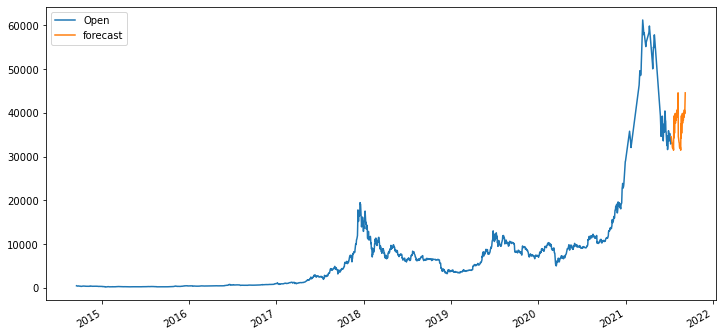

In [86]:
data['Open'].plot(figsize=(12,6),label='Open')
data['Forecast'].plot(label='forecast')
plt.legend()

In [68]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [51]:
#Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  10.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   7.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   8.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   7.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   8.2s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   6.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  10.4s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  25.3s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   4.4s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   6.4s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  21.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=  19.4s
[CV] END bootstrap=False, max_depth=1

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  10.5s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  25.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   4.5s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   6.6s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  21.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=  19.1s
[CV] END bootstrap=False, max_depth=1

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   6.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   7.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  24.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   4.5s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   4.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   8.8s
[CV] END bootstrap=False, max_depth=10,

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_sampl

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 200}

In [52]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 1035.5708 degrees.
Accuracy = 85.40%.


In [53]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.52%.


NameError: name 'predictions' is not defined